In [9]:
import csv
import numpy as np
import torch
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import matplotlib.pyplot as plt



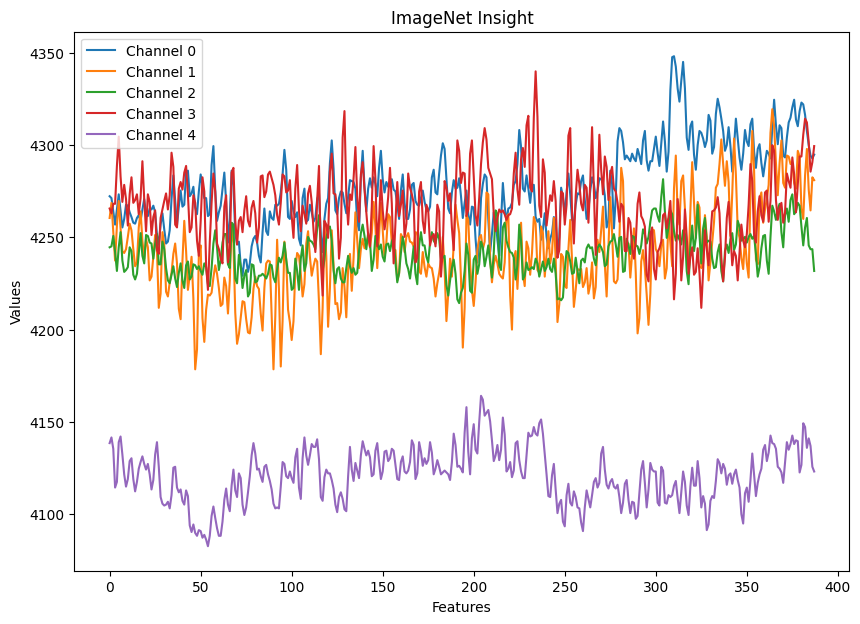

In [12]:
csv_data = list(csv.reader(open('../MindBigData-Imagenet/MindBigData_Imagenet_Insight_n00007846_112420_1_1479.csv', 'r')))

# data = np.zeros((len(csv_data), len(csv_data[0])-1))
# for i in range(len(data)):
#     data[i] = csv_data[i][1:]
data = np.array(csv_data)[:,1:].astype(float)

# plot 
plt.figure(figsize=(10, 7))
for i in range(len(data)):
    plt.plot(data[i], label='Channel '+str(i))
plt.legend()
plt.title('ImageNet Insight')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

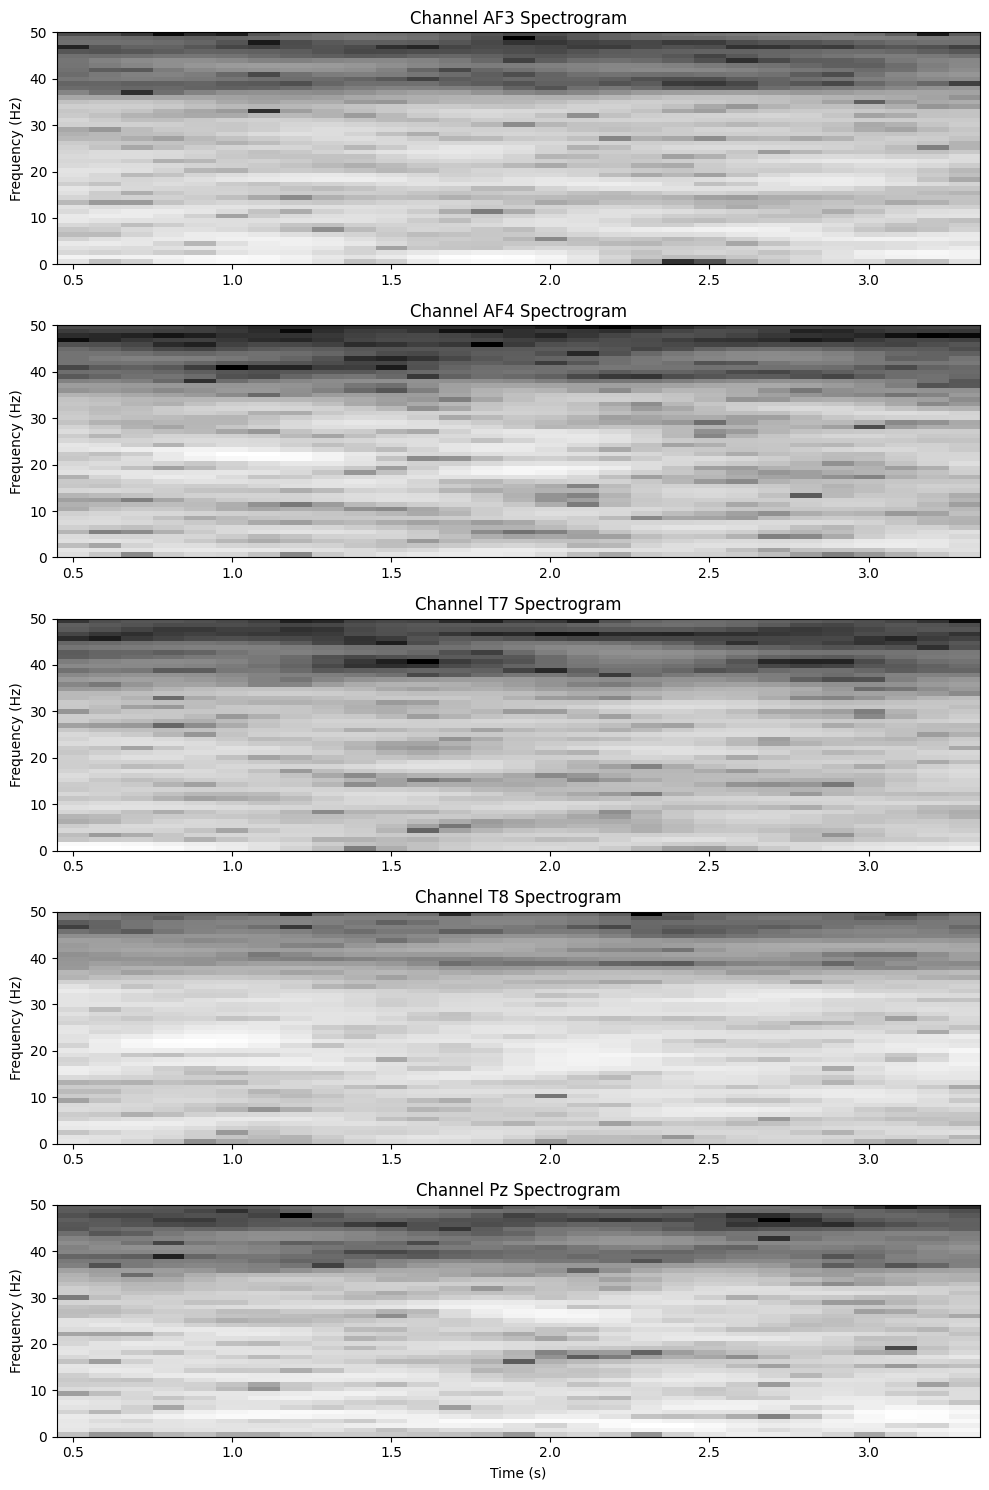

In [110]:
import matplotlib.pyplot as plt
import numpy as np
import csv

# Load data
with open('../MindBigData-Imagenet/MindBigData_Imagenet_Insight_n00007846_6247_1_785.csv', 'r') as file:
    csv_reader = csv.reader(file)
    labels = []  # To store channel labels
    data = []    # To store numerical data
    for row in csv_reader:
        labels.append(row[0])  # Capture the label
        data.append([float(value) for value in row[1:]])  # Convert strings to floats

data = np.array(data)  # Convert list to numpy array for easier handling

# Normalize the data (mean = 0, std = 1)
data = (data - np.mean(data, axis=1, keepdims=True)) / np.std(data, axis=1, keepdims=True)

# Create a figure with subplots (one for each channel)
num_channels = len(data)
fig, axs = plt.subplots(num_channels, 1, figsize=(10, 15))

# Generate spectrogram for each channel
for i in range(num_channels):
    axs[i].specgram(data[i], NFFT=100, Fs=100, noverlap=90, cmap='gray')
    axs[i].set_title(f'Channel {labels[i]} Spectrogram')
    axs[i].set_ylabel('Frequency (Hz)')

# Add a common x-label
plt.xlabel('Time (s)')
plt.tight_layout()
plt.show()

(14012, 5, 360)
(5, 360)


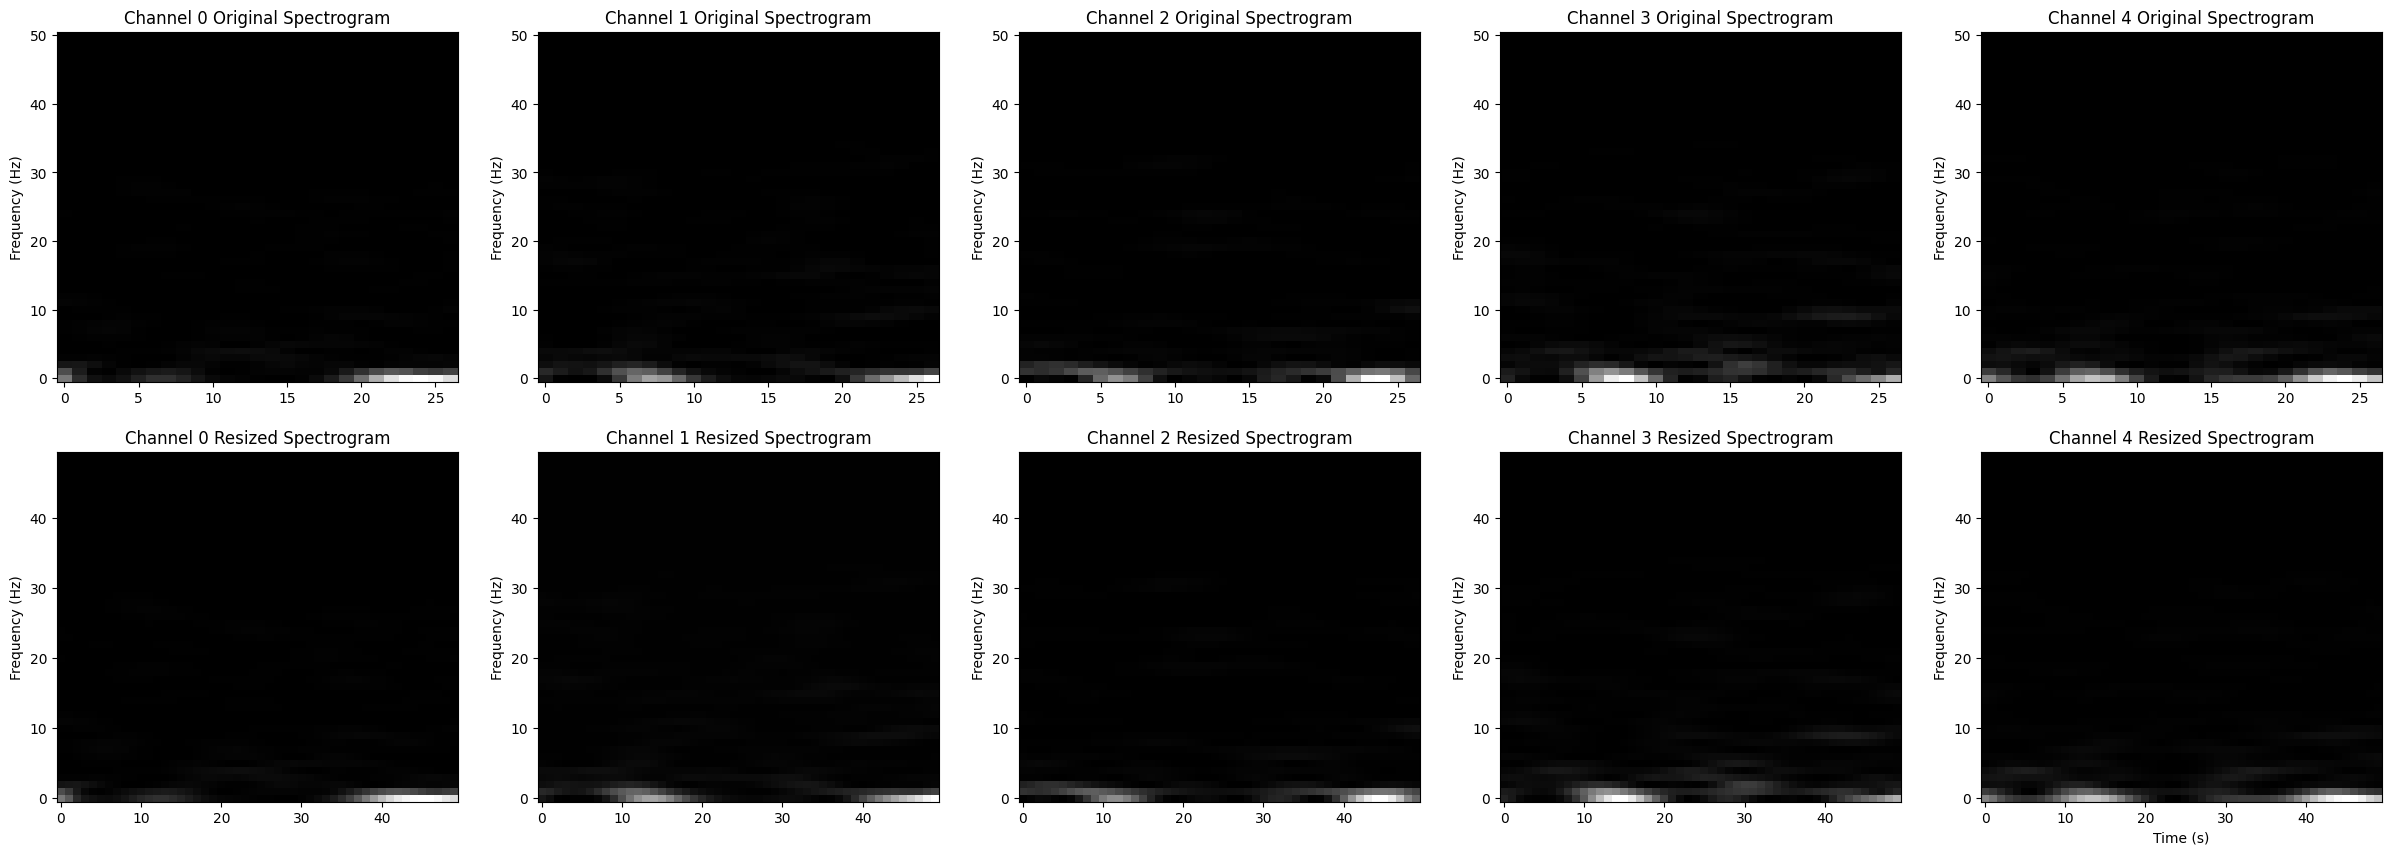

In [134]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import zoom
from numpy.fft import fft
import csv

# Load data from .npy file
data = np.load('../data.npy')  # Adjust the path as necessary

# data is structured with idx, channel, time
print(data.shape)

# Use example_idx for processing
example_idx = 500

# Normalize the data (mean = 0, std = 1) for the selected example index
epsilon = 1e-10  # Small value to avoid division by zero
data[example_idx] = (data[example_idx] - np.mean(data[example_idx], axis=1, keepdims=True)) / (np.std(data[example_idx], axis=1, keepdims=True) + epsilon)

# Create a figure with subplots (one for each channel)
num_channels = data.shape[1]

# Assuming 'data' is already loaded and 'num_channels' is defined
spectrograms = []
resized_spectrograms = []

print(data[example_idx].shape)

for i in range(num_channels):
    # Parameters for the STFT
    NFFT = 100
    noverlap = 90
    step = NFFT - noverlap
    window = np.hanning(NFFT)
    segments = []

    # Segment the data and apply window
    for start in range(0, len(data[example_idx][i]) - NFFT + 1, step):
        segment = data[example_idx][i][start:start + NFFT]
        windowed_segment = segment * window
        segments.append(windowed_segment)

    # Compute FFT for each segment and store power spectral density
    Pxx = [np.abs(fft(seg)[:NFFT // 2 + 1])**2 for seg in segments]  # Use only the first half
    Pxx = np.array(Pxx).T  # Transpose to align time and frequency correctly

    # Resize the spectrogram to 50x50 using bicubic interpolation
    Pxx_resized = zoom(Pxx, (50 / Pxx.shape[0], 50 / Pxx.shape[1]), order=3)

    # Store the original and resized spectrograms
    spectrograms.append(Pxx)
    resized_spectrograms.append(Pxx_resized)

# Create a figure with subplots for original and resized spectrograms
fig, axs = plt.subplots(2, num_channels, figsize=(30, 10))  # Adjust size as needed

for i in range(num_channels):
    # Plot original spectrogram
    ax_original = axs[0, i] if num_channels > 1 else axs[0]
    img_original = ax_original.imshow(spectrograms[i], aspect='auto', cmap='gray', origin='lower')
    ax_original.set_title(f'Channel {i} Original Spectrogram')
    ax_original.set_ylabel('Frequency (Hz)')
    
    # Plot resized spectrogram
    ax_resized = axs[1, i] if num_channels > 1 else axs[1]
    img_resized = ax_resized.imshow(resized_spectrograms[i], aspect='auto', cmap='gray', origin='lower')
    ax_resized.set_title(f'Channel {i} Resized Spectrogram')
    ax_resized.set_ylabel('Frequency (Hz)')

# Add a common x-label
plt.xlabel('Time (s)')
plt.show()

(14012, 5, 360)
(5, 360)


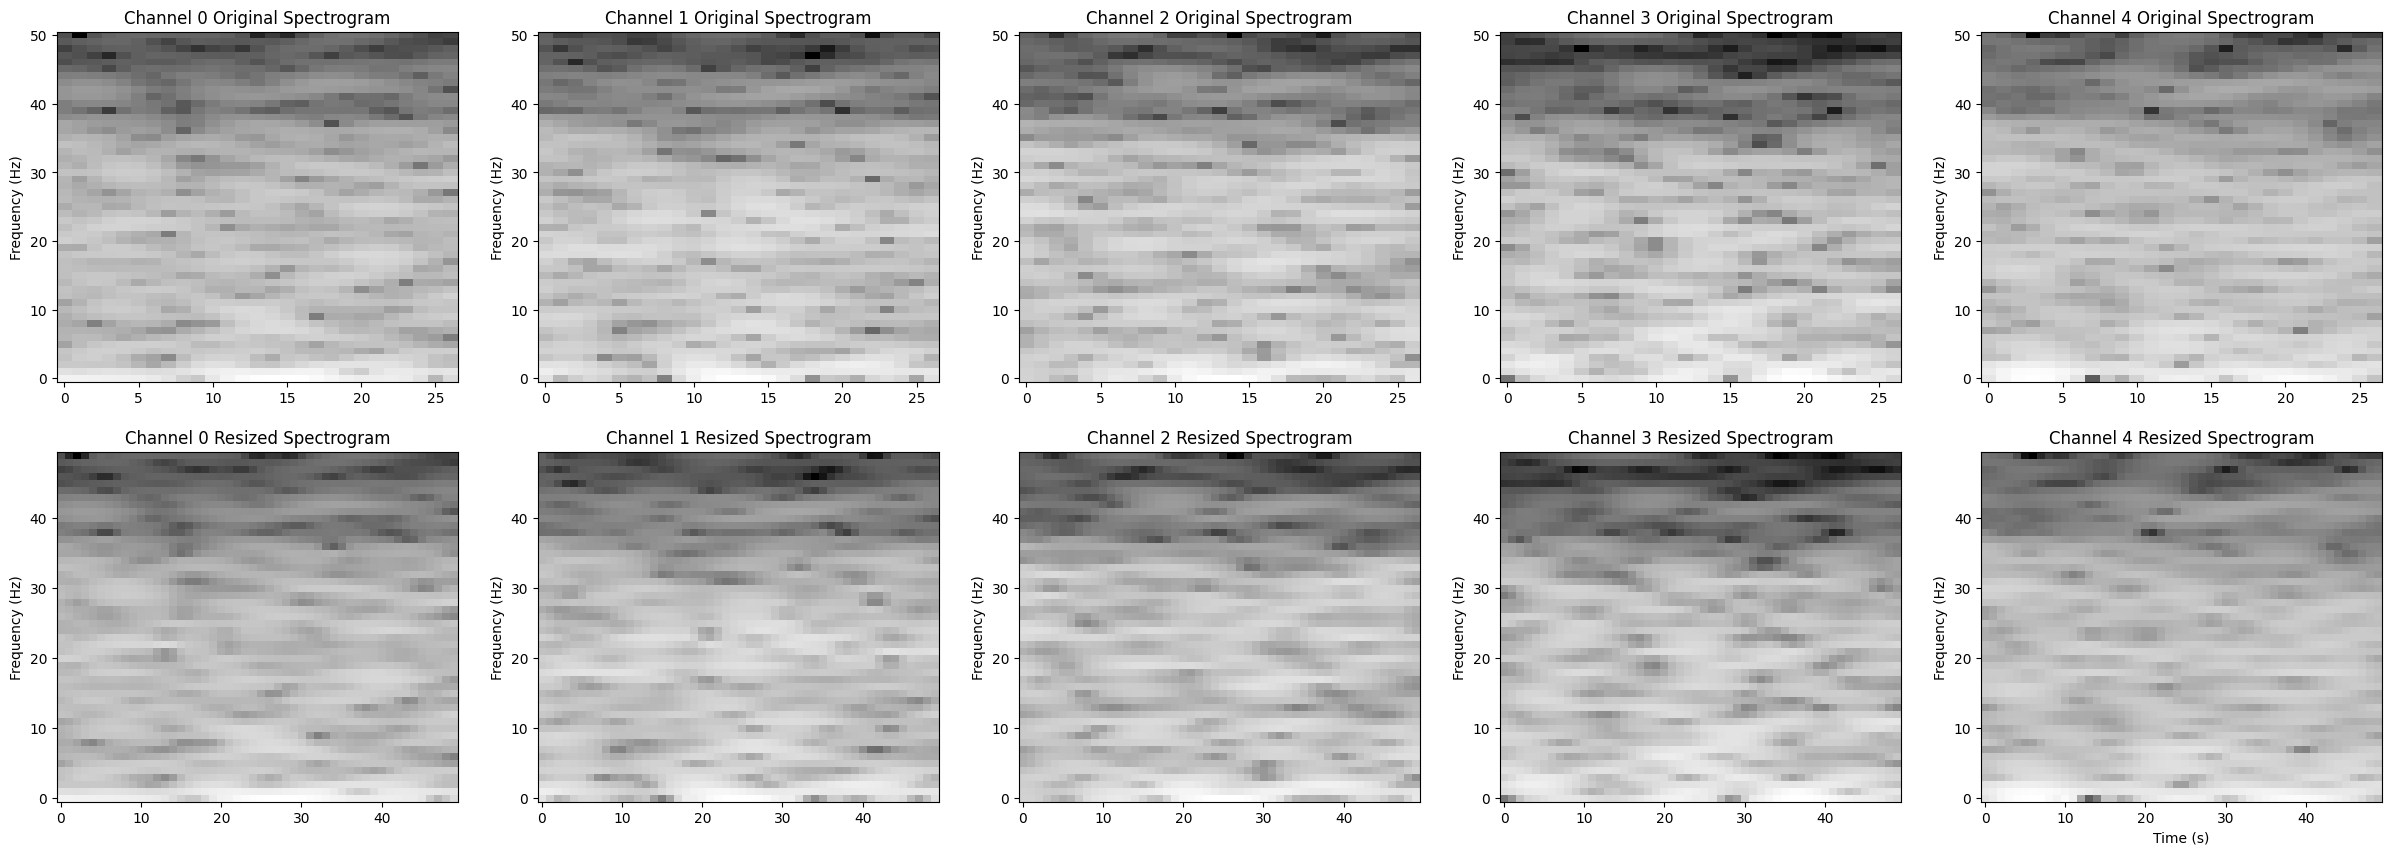

In [135]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import zoom
from numpy.fft import fft
import csv

# Load data from .npy file
data = np.load('../data.npy')  # Adjust the path as necessary

# data is structured with idx, channel, time
print(data.shape)

# Use example_idx for processing
example_idx = 500

# Normalize the data (mean = 0, std = 1) for the selected example index
epsilon = 1e-10  # Small value to avoid division by zero
data[example_idx] = (data[example_idx] - np.mean(data[example_idx], axis=1, keepdims=True)) / (np.std(data[example_idx], axis=1, keepdims=True) + epsilon)

# Create a figure with subplots (one for each channel)
num_channels = data.shape[1]

# Assuming 'data' is already loaded and 'num_channels' is defined
spectrograms = []
resized_spectrograms = []

print(data[example_idx].shape)

for i in range(num_channels):
    # Parameters for the STFT
    NFFT = 100
    noverlap = 90
    step = NFFT - noverlap
    window = np.hanning(NFFT)
    segments = []

    # Segment the data and apply window
    for start in range(0, len(data[example_idx][i]) - NFFT + 1, step):
        segment = data[example_idx][i][start:start + NFFT]
        windowed_segment = segment * window
        segments.append(windowed_segment)

    # Compute FFT for each segment and store power spectral density
    Pxx = [np.abs(fft(seg)[:NFFT // 2 + 1])**2 for seg in segments]  # Use only the first half
    Pxx = np.array(Pxx).T  # Transpose to align time and frequency correctly

    # Apply 10 * log10 transformation
    Pxx = 10 * np.log10(Pxx + epsilon)  # Add epsilon to avoid log(0)

    # Resize the spectrogram to 50x50 using bicubic interpolation
    Pxx_resized = zoom(Pxx, (50 / Pxx.shape[0], 50 / Pxx.shape[1]), order=3)

    # Store the original and resized spectrograms
    spectrograms.append(Pxx)
    resized_spectrograms.append(Pxx_resized)

# Create a figure with subplots for original and resized spectrograms
fig, axs = plt.subplots(2, num_channels, figsize=(30, 10))  # Adjust size as needed

for i in range(num_channels):
    # Plot original spectrogram
    ax_original = axs[0, i] if num_channels > 1 else axs[0]
    img_original = ax_original.imshow(spectrograms[i], aspect='auto', cmap='gray', origin='lower')
    ax_original.set_title(f'Channel {i} Original Spectrogram')
    ax_original.set_ylabel('Frequency (Hz)')
    
    # Plot resized spectrogram
    ax_resized = axs[1, i] if num_channels > 1 else axs[1]
    img_resized = ax_resized.imshow(resized_spectrograms[i], aspect='auto', cmap='gray', origin='lower')
    ax_resized.set_title(f'Channel {i} Resized Spectrogram')
    ax_resized.set_ylabel('Frequency (Hz)')

# Add a common x-label
plt.xlabel('Time (s)')
plt.show()

In [136]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import zoom
from numpy.fft import fft
from tqdm import tqdm  # Import tqdm for the progress bar
import os

# Load data from .npy file
data = np.load('../data.npy')  # Adjust the path as necessary

# data is structured with idx, channel, time
print(data.shape)

# Parameters for the STFT
NFFT = 100
noverlap = 90
step = NFFT - noverlap
window = np.hanning(NFFT)

# Initialize list to store resized spectrograms
resized_spectrograms = []

# Process each index in the dataset with a progress bar
for example_idx in tqdm(range(data.shape[0]), desc="Processing data"):
    # Normalize the data (mean = 0, std = 1) for the selected example index
    epsilon = 1e-10  # Small value to avoid division by zero
    data[example_idx] = (data[example_idx] - np.mean(data[example_idx], axis=1, keepdims=True)) / (np.std(data[example_idx], axis=1, keepdims=True) + epsilon)

    num_channels = data.shape[1]
    example_spectrograms = []

    for i in range(num_channels):
        segments = []

        # Segment the data and apply window
        for start in range(0, len(data[example_idx][i]) - NFFT + 1, step):
            segment = data[example_idx][i][start:start + NFFT]
            windowed_segment = segment * window
            segments.append(windowed_segment)

        # Compute FFT for each segment and store power spectral density
        Pxx = [np.abs(fft(seg)[:NFFT // 2 + 1])**2 for seg in segments]  # Use only the first half
        Pxx = np.array(Pxx).T  # Transpose to align time and frequency correctly

        # Apply 10 * log10 transformation
        Pxx = 10 * np.log10(Pxx + epsilon)  # Add epsilon to avoid log(0)   

        # Resize the spectrogram to 50x50 using bicubic interpolation
        Pxx_resized = zoom(Pxx, (50 / Pxx.shape[0], 50 / Pxx.shape[1]), order=3)

        # Store the resized spectrogram
        example_spectrograms.append(Pxx_resized)

    # Append the spectrograms for this example to the main list
    resized_spectrograms.append(example_spectrograms)

# Convert the list to a numpy array with the desired shape [idx, channel, height, width]
resized_spectrograms = np.array(resized_spectrograms)
print(resized_spectrograms.shape)

# Save the resized spectrograms to a .npy file
np.save('../spectrograms.npy', resized_spectrograms)

(14012, 5, 360)


Processing data: 100%|██████████| 14012/14012 [00:17<00:00, 804.69it/s]


(14012, 5, 50, 50)


(14012, 5, 50, 50)


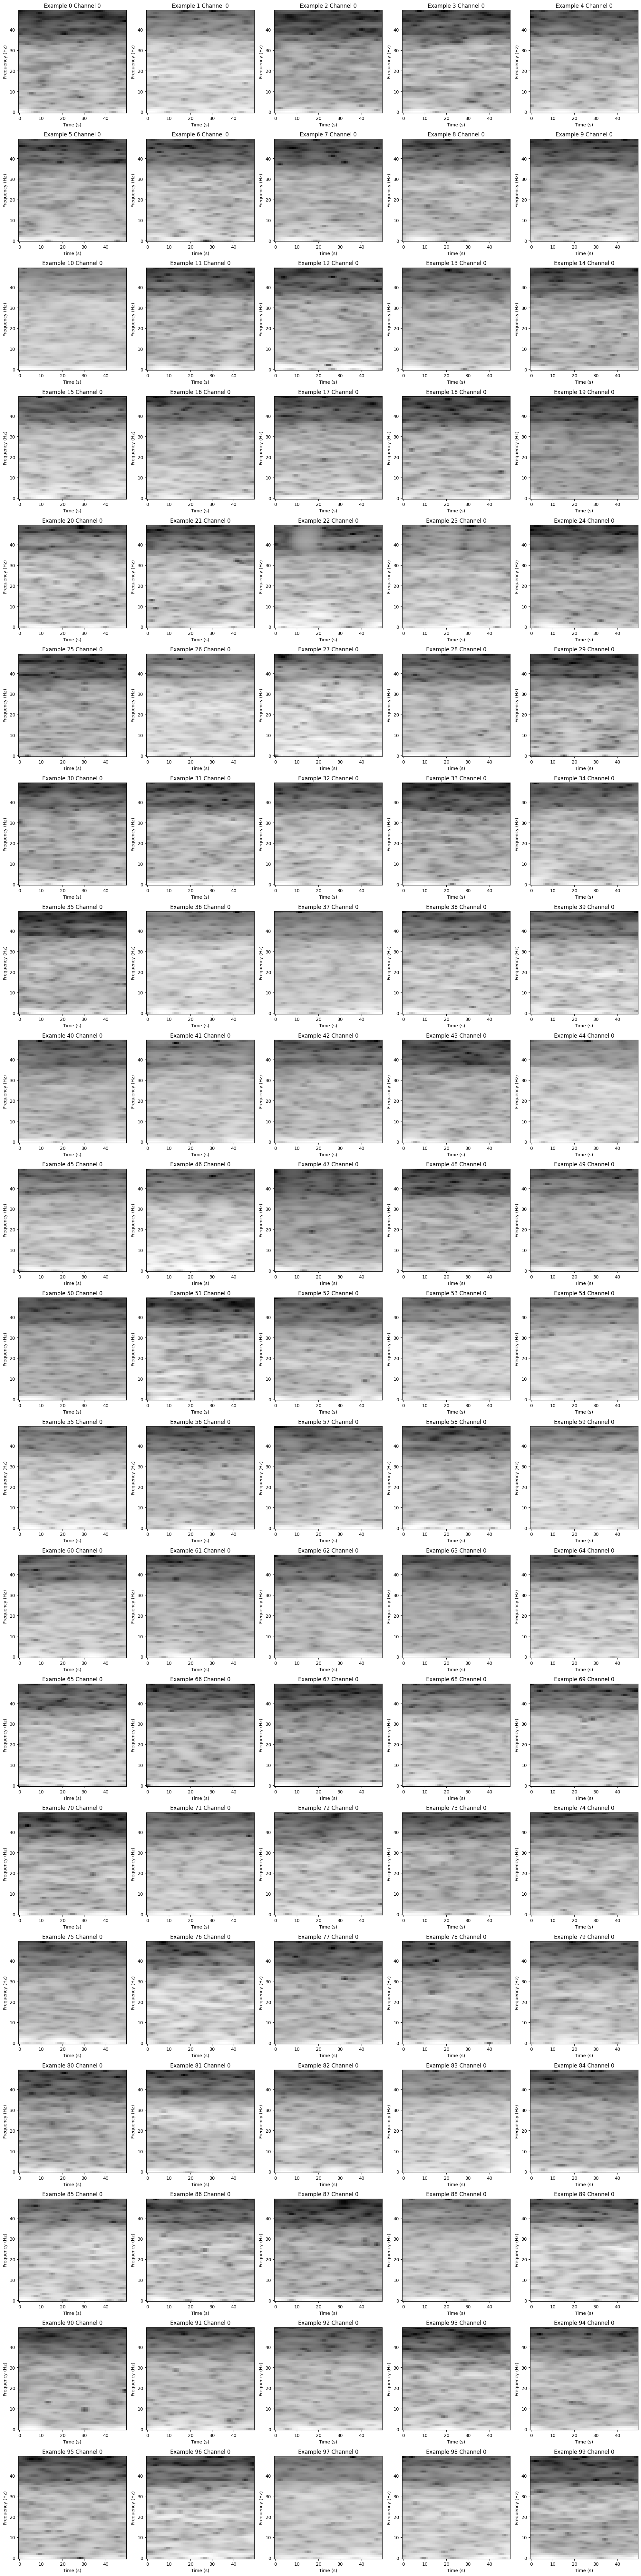

In [137]:
import matplotlib.pyplot as plt
import numpy as np

# Load the resized spectrograms from the .npy file
resized_spectrograms = np.load('../spectrograms.npy')  # Adjust the path as necessary

# Print the shape of the loaded spectrograms to verify
print(resized_spectrograms.shape)

# Number of spectrograms to plot
num_spectrograms_to_plot = 100

# Create a figure with subplots
fig, axs = plt.subplots(num_spectrograms_to_plot // 5, 5, figsize=(20, 4 * (num_spectrograms_to_plot // 5)))

# Plot the spectrograms
for idx in range(num_spectrograms_to_plot):
    ax = axs[idx // 5, idx % 5]
    img = ax.imshow(resized_spectrograms[idx, 0], aspect='auto', cmap='gray', origin='lower')  # Plot the first channel
    ax.set_title(f'Example {idx} Channel 0')
    ax.set_ylabel('Frequency (Hz)')
    ax.set_xlabel('Time (s)')

plt.tight_layout()
plt.show()

In [51]:
path = '../MindBigData-Imagenet'
len(os.listdir(path))
data = []
for item in tqdm(os.listdir(path)):
    path_i = os.path.join(path, item)
    csv_data = list(csv.reader(open(path_i, 'r')))
    np_data = np.array(csv_data)[:,1:].astype(float)
    data.append(np_data)
    # close file
    csv_data = None
data = np.array(data)
data.shape

100%|██████████| 14012/14012 [00:14<00:00, 982.67it/s] 


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (14012, 5) + inhomogeneous part.